In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
Data = pd.read_csv("0.DataSource/CARVAN_OASA_England_Northern_Ireland_Scotland_Wales_Descriptions.csv")
Data.drop(columns=["GEO_TYPE","GEO_TYP2","Households with no cars","Households with 1 car","Households with 2 car","Households with 3 car","Households with 4 car"],inplace=True)
# CSV file taken from 'https://www.ons.gov.uk/datasets/TS045/editions/2021/versions/4/filter-outputs/21f5ef3b-68bf-44ee-b610-f654febc6e8d#get-data'

In [6]:
Data.head()

,Output Areas,TotalHousehold,TotalCars
0,E00000001,99,70
1,E00000003,112,100
2,E00000005,217,101
3,E00000007,83,31
4,E00000010,78,14


In [9]:
Data.sum(numeric_only=True)

TotalHousehold    26442096
TotalCars         30654621
dtype: int64

In [75]:
OALabels = pd.read_csv('./0.DataSource/PC_OA_LSOA_MSOA/OA_LSOA_NAMES.csv')
OA_CODE_LABEL_Dict = OALabels.set_index('OA_21_Code')['LSOA_21_Name'].to_dict()

In [76]:
Index = "Output Areas"
#Index = "Middle layer Super Output Areas Code"
#Index = "Lower layer Super Output Areas Code"
Organised = Data.pivot_table(values="Observation", index=Index, columns="Car or van availability (5 categories)")
Organised.drop(columns=["Does not apply"],inplace=True)

In [77]:
Organised["TotalHousehold"] = Organised.sum(axis=1) # Total number of Households
Organised["TotalCars"] = Organised["1 car or van in household"]+Organised["2 cars or vans in household"]*2+Organised["3 or more cars or vans in household"]*3

In [78]:
Organised

Car or van availability (5 categories),1 car or van in household,2 cars or vans in household,3 or more cars or vans in household,No cars or vans in household,TotalHousehold,TotalCars
Output Areas,,,,,,
E00000001,41,5,3,46,95,60
E00000003,47,7,4,51,109,73
E00000005,18,2,4,37,61,34
E00000007,16,4,0,66,86,24
E00000010,17,0,0,109,126,17
...,...,...,...,...,...,...
W00010693,21,1,2,33,57,29
W00010694,67,60,18,14,159,241
W00010695,25,25,15,12,77,120


In [79]:
Organised.sum() # Check that the number of house and cars are roughly in line with the national understanding.

Car or van availability (5 categories)
1 car or van in household              10237105
2 cars or vans in household             6485801
3 or more cars or vans in household     2282477
No cars or vans in household            5777884
TotalHousehold                         24783267
TotalCars                              30056138
dtype: int64

In [80]:
Organised["CarsToHomesRatio"] = Organised["TotalCars"] / Organised["TotalHousehold"] # Mean number of cars per households

In [81]:
Organised['Normal names'] = Organised.index.map(OA_CODE_LABEL_Dict)

In [82]:
TotalCarsNationally = Organised["TotalCars"].sum()

In [83]:
HousePowerProfileSeasons = pd.read_csv("0.DataSource/National Demand/SeasonallyAverage_TSD.csv",index_col="Hour")
HPProfileSeasons = pd.read_csv("0.DataSource/National Demand/SeasonallyAverage_DPDemonstrationProject.csv",index_col="Hour")
Combined = HousePowerProfileSeasons + HPProfileSeasons # Seasonally Averaged Transmission System Demand (kWe) + HP Demonstration project, Seasonally Averare HP power use (kWe)
WinterCombined = Combined['Winter'].to_list()
AnnualCombined = Combined['Annual'].to_list()
#
def multiply_row(row, multiplier_list):
    return [row * multiplier for multiplier in multiplier_list]
#
Organised['PowerProfile_kWe'] = Organised.apply(lambda row: multiply_row(row['TotalHousehold'], WinterCombined), axis=1)
Organised.head()

Car or van availability (5 categories),1 car or van in household,2 cars or vans in household,3 or more cars or vans in household,No cars or vans in household,TotalHousehold,TotalCars,CarsToHomesRatio,Normal names,PowerProfile_kWe
Output Areas,,,,,,,,,
E00000001,41,5,3,46,95,60,0.631579,City of London 001A,"[184.89737142762257, 189.12774343216105, 188.9..."
E00000003,47,7,4,51,109,73,0.669725,City of London 001A,"[212.1454051116933, 216.99920035900587, 216.81..."
E00000005,18,2,4,37,61,34,0.557377,City of London 001A,"[118.7235753377366, 121.43991946696659, 121.33..."
E00000007,16,4,0,66,86,24,0.279070,City of London 001A,"[167.3807783450057, 171.2103782649037, 171.067..."
E00000010,17,0,0,109,126,17,0.134921,City of London 001C,"[245.23230315663628, 250.8431123416031, 250.63..."


In [84]:
# Seasons = {1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',
#          7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'}
# HourlyDF = pd.read_csv("0.DataSource/National Demand/df_fuel_ckan_DemandPriceTemp_Hourly.csv")
# HourlyDF['DATETIME'] = pd.to_datetime(HourlyDF['DATETIME'])
# HourlyDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year >= 2023) & (HourlyDF['DATETIME'].dt.year <= 2023)]
# #
# HourlyDF['Year'],HourlyDF['Month'],HourlyDF['Day'],HourlyDF['WeekNumber'],HourlyDF['DaysOfTheYear'],\
#     HourlyDF['DayOfTheWeek'],HourlyDF['Hour'] = HourlyDF['DATETIME'].dt.year,\
#     HourlyDF['DATETIME'].dt.month,HourlyDF['DATETIME'].dt.day,HourlyDF['DATETIME'].dt.isocalendar().week,\
#     HourlyDF['DATETIME'].dt.dayofyear,HourlyDF['DATETIME'].dt.dayofweek,HourlyDF['DATETIME'].dt.hour
# HourlyDF['Seasons'] = HourlyDF['Month'].map(Seasons)
# HourlyDF.insert(2,'Seasons',HourlyDF.pop('Seasons'))
# SeasonallyAvg = HourlyDF.pivot_table(values="TRANSMISSION_SYSTEM_DEMAND", index="Hour", columns="Seasons")
# SeasonallyAvg/24783.267

In [85]:
# in MILES
# UK, Department of Transport, 2019 data. 2020,2021,2022 are availiable however are discounted.
Miles = np.array([0,1,2,5,10,25,50,100,300])
PecentOfCarsMiles = np.array([0.0000,0.0043,0.0253,0.1156,0.1616,0.2828,0.1652,0.1143,0.1308])
if (round(sum(PecentOfCarsMiles),2) != 1):
    exit(f"The provided 'PecentrOfCars' must add up to one, current ({round(sum(PecentOfCarsMiles),2)}). Exiting ...")
MilesPerkWh = 3  # 3 Mles/kWh
kWhEqu = Miles/MilesPerkWh
TotalPower100Cars = sum(np.multiply(kWhEqu,PecentOfCarsMiles)*100) # 2226.66
NoOfCarsfor1000kWe = 100/(TotalPower100Cars/1000)  # For 1000kWe or 1MWe.
NoOfCarsfor1kWe = float(100/(TotalPower100Cars))  # For 1kWe.

In [86]:
# from tqdm import tqdm
# MainOrganisedDF = pd.DataFrame()
# #for Scaler in tqdm(np.arange(1,1.7,0.01)):
# for Scaler in np.arange(1,1.71,0.01):
#     def MaxValue(row):
#         return max(row)
#     Organised['MaxPower_kWe'] = np.vectorize(MaxValue)(Organised['PowerProfile_kWe'])
#     #
#     def CarsBeingCharged(PowerProfile):
#         MaxPower = max(PowerProfile)*Scaler # Max of the profile for now, in kWe.
#         values = []
#         for val in PowerProfile:
#             values.append((MaxPower-val)*NoOfCarsfor1kWe)
#         return values
#     Organised['NumberOfCars'] = Organised['PowerProfile_kWe'].apply(CarsBeingCharged)
#     #
#     def SumRow(row):
#         return sum(row)
#     Organised['TotalCarsCharged'] = np.vectorize(SumRow)(Organised['NumberOfCars'])
#     #
#     def RealignTotalCarsCharged(TotalCars,TotalCarsCharged):
#         if TotalCarsCharged >= TotalCars:
#             return TotalCars
#         else:
#             return TotalCarsCharged
#     Organised['TotalCarsCharged'] = np.vectorize(RealignTotalCarsCharged)(Organised['TotalCars'],Organised['TotalCarsCharged'])
#     #
#     def EVChargingPenetrationRateAndFlag(df):
#        if df['TotalCarsCharged'] >= df['TotalCars']:
#           return [100,'Enough']
#        else:
#           return [100*(df['TotalCarsCharged'] / df['TotalCars']),'Not Enough']
#     Organised[['EV_ChargingPenetrationRate','EV_SufficiencyFlag']] = Organised.apply(EVChargingPenetrationRateAndFlag, axis=1,result_type='expand')
#     ##############
#     Organised["PowerLiftRatio,Perc"] = int(Scaler*100)
#     ColsDrop = ['1 car or van in household', '2 cars or vans in household','3 or more cars or vans in household', 'No cars or vans in household','PowerProfile_kWe','NumberOfCars']
#     Organised.drop(columns=ColsDrop,inplace=True)
#     #MainOrganisedDF = pd.concat([MainOrganisedDF, Organised])
#     ##############
#     ValueNumbers = Organised["EV_SufficiencyFlag"].value_counts()
#     ValueNormalised = Organised["EV_SufficiencyFlag"].value_counts(normalize=True)
#     ##############
#     try:
#         NumNotEnough = ValueNumbers["Not Enough"]
#     except:
#         NumNotEnough = 0
#     #
#     try:
#         PercNotEnough = round(ValueNormalised["Not Enough"]*100,3)
#     except:
#         PercNotEnough = 0
#     NumEnough = ValueNumbers["Enough"]
#     PercEnough = round(ValueNormalised["Enough"]*100,3)
#     TotalCarsCharged = int(Organised['TotalCarsCharged'].sum())
#     MeanPenetration = round(Organised["EV_ChargingPenetrationRate"].mean(),7)
#     PercentCarsChargedNationally = round((TotalCarsCharged*100)/TotalCarsNationally,7)
#     print(f"{int(Scaler*100)}%, NotEnough OA {NumNotEnough}, Enough OA {NumEnough} ## %NotEnough OA {PercNotEnough}%, %Enough OA {PercEnough}% ## Mean successful charging (OA) {MeanPenetration}%, Nationally (EV Charged): {TotalCarsCharged}/{TotalCarsNationally}, {PercentCarsChargedNationally}%.")
# # # MainOrganisedDF.to_csv("0.DataSource/CarOR_VanAvailability_OA_AnalysisCombined.csv")

In [92]:
Scaler = 1.60
# For Manual Checking
def MaxValue(row):
    return max(row)
Organised['MaxPower_kWe'] = np.vectorize(MaxValue)(Organised['PowerProfile_kWe'])
def CarsBeingCharged(PowerProfile):
    MaxPower = max(PowerProfile)*Scaler # Max of the profile for now, in kWe.
    values = []
    for val in PowerProfile:
        values.append((MaxPower-val)*NoOfCarsfor1kWe)
    return values
Organised['NumberOfCars'] = Organised['PowerProfile_kWe'].apply(CarsBeingCharged)
def SumRow(row):
    return sum(row)
Organised['TotalCarsCharged'] = np.vectorize(SumRow)(Organised['NumberOfCars'])
def RealignTotalCarsCharged(TotalCars,TotalCarsCharged):
    if TotalCarsCharged >= TotalCars:
        return TotalCars
    else:
        return TotalCarsCharged
Organised['TotalCarsCharged'] = np.vectorize(RealignTotalCarsCharged)(Organised['TotalCars'],Organised['TotalCarsCharged'])
def EVChargingPenetrationRateAndFlag(df):
   if df['TotalCarsCharged'] >= df['TotalCars']:
      return [100,'Enough']
   else:
      return [100*(df['TotalCarsCharged'] / df['TotalCars']),'Not Enough']
Organised[['EV_ChargingPenetrationRate','EV_SufficiencyFlag']] = Organised.apply(EVChargingPenetrationRateAndFlag, axis=1,result_type='expand')
#
ValueNumbers = Organised["EV_SufficiencyFlag"].value_counts()
ValueNormalised = Organised["EV_SufficiencyFlag"].value_counts(normalize=True)
try:
    NumNotEnough = ValueNumbers["Not Enough"]
except:
    NumNotEnough = 0
#
try:
    PercNotEnough = round(ValueNormalised["Not Enough"]*100,3)
except:
    PercNotEnough = 0
NumEnough = ValueNumbers["Enough"]
PercEnough = round(ValueNormalised["Enough"]*100,3)
TotalCarsCharged = int(Organised['TotalCarsCharged'].sum())
MeanPenetration = round(Organised["EV_ChargingPenetrationRate"].mean(),7)
PercentCarsChargedNationally = round((TotalCarsCharged*100)/TotalCarsNationally,7)
print(f"{int(Scaler*100)}%, NotEnough OA {NumNotEnough}, Enough OA {NumEnough} ## %NotEnough OA {PercNotEnough}%, %Enough OA {PercEnough}% ## Mean successful charging (OA) {MeanPenetration}%, Nationally (EV Charged): {TotalCarsCharged}/{TotalCarsNationally}, {PercentCarsChargedNationally} %.")

160%, NotEnough OA 84, Enough OA 188796 ## %NotEnough OA 0.044%, %Enough OA 99.956% ## Mean successful charging (OA) 99.9988284%, Nationally (EV Charged): 30055591/30056138, 99.9981801 %.


In [93]:
Organised.loc[Organised['EV_SufficiencyFlag'] == 'Not Enough'][['Normal names','TotalHousehold','TotalCars','CarsToHomesRatio','TotalCarsCharged','EV_ChargingPenetrationRate','EV_SufficiencyFlag']]

Car or van availability (5 categories),Normal names,TotalHousehold,TotalCars,CarsToHomesRatio,TotalCarsCharged,EV_ChargingPenetrationRate,EV_SufficiencyFlag
Output Areas,,,,,,,
E00011333,Havering 015A,135,296,2.192593,294,99.324324,Not Enough
E00031097,Trafford 028A,122,279,2.286885,265,94.982079,Not Enough
E00032172,Wigan 039C,134,299,2.231343,292,97.658863,Not Enough
E00065678,East Riding of Yorkshire 018A,112,249,2.223214,244,97.991968,Not Enough
E00068748,Leicester 001A,73,160,2.191781,159,99.375000,Not Enough
...,...,...,...,...,...,...,...
E00187166,Shropshire 035B,121,287,2.371901,263,91.637631,Not Enough
E00188246,Hartlepool 014A,147,323,2.197279,320,99.071207,Not Enough
E00188680,Horsham 005B,109,244,2.238532,237,97.131148,Not Enough


In [88]:
# EVPenetrationRateBins = np.arange(0,101,10)
# #Organised["EV_ChargingPenetrationRate"].value_counts(bins=EVPenetrationRateBins,sort=False)
# Organised["EV_ChargingPenetrationRate"].value_counts(bins=EVPenetrationRateBins,normalize=True,sort=False)*100

In [94]:
CarHomeBins = [0,0.5,1,1.5,2,2.5]
Organised["CarsToHomesRatio"].value_counts(bins=CarHomeBins,sort=False)

(-0.001, 0.5]    10309
(0.5, 1.0]       47402
(1.0, 1.5]       79386
(1.5, 2.0]       50066
(2.0, 2.5]        1717
Name: CarsToHomesRatio, dtype: int64

1.2162091279755753


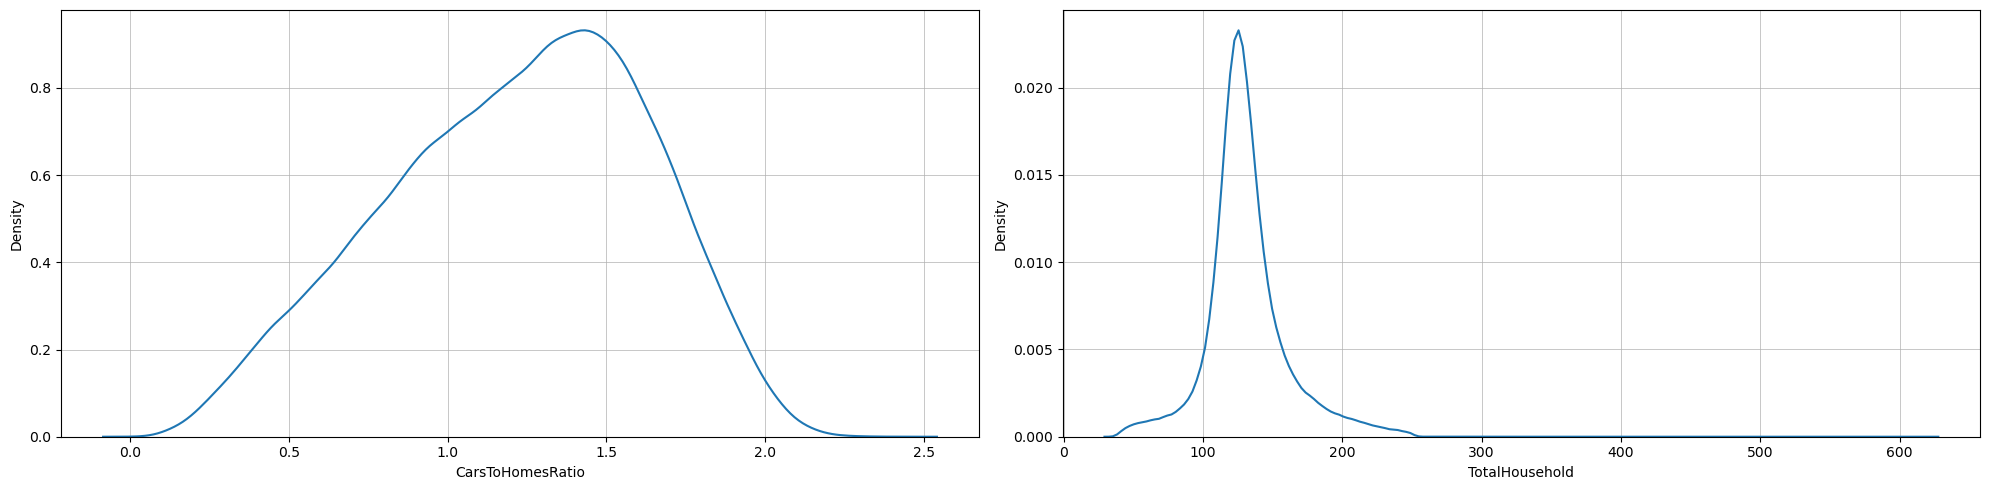

In [145]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(Organised["CarsToHomesRatio"])
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(1,2,2)
sns.kdeplot(Organised["TotalHousehold"])
plt.grid(which='both',linewidth = 0.5)
plt.tight_layout()
print(Organised["CarsToHomesRatio"].mean())